In [22]:
from ROOT import *
import numpy as np
import matplotlib.pyplot as plt


In [23]:
t1=np.array([]);tc1=np.array([]);risc1=np.array([]);pt1=np.array([])
t2=np.array([]);tc2=np.array([]);risc2=np.array([]);pt2=np.array([])
t3=np.array([]);tc3=np.array([]);risc3=np.array([]);pt3=np.array([])
t4=np.array([]);tc4=np.array([]);risc4=np.array([]);pt4=np.array([])
t5=np.array([]);tc5=np.array([]);risc5=np.array([]);pt5=np.array([])

G=2000; thermal_conversion=41e-6

for line in open("file_1_1s.lvm"):
    d=line.split()
    if len(d)!=4:
        continue
    t1   = np.append(t1,  float(d[0])); tc1   = np.append(tc1,  -float(d[1])/(G*thermal_conversion))
    risc1  = np.append(risc1, float(d[2])); pt1  = np.append(pt1, float(d[3]))

for line in open("file_2_1s.txt"):
    d=line.split()
    if len(d)!=4:
        continue
    t2   = np.append(t2,  float(d[0])); tc2   = np.append(tc2,  -float(d[1])/(G*thermal_conversion))
    risc2  = np.append(risc2, float(d[2])); pt2  = np.append(pt2, float(d[3]))

for line in open("file_3_1s.txt"):
    d=line.split()
    if len(d)!=4:
        continue
    t3   = np.append(t3,  float(d[0])); tc3   = np.append(tc3,  -float(d[1])/(G*thermal_conversion))
    risc3  = np.append(risc3, float(d[2])); pt3  = np.append(pt3, float(d[3]))

for line in open("file_4_0.5s.txt"):
    d=line.split()
    if len(d)!=4:
        continue
    t4   = np.append(t4,  float(d[0])); tc4   = np.append(tc4,  -float(d[1])/(G*thermal_conversion))
    risc4  = np.append(risc4, float(d[2])); pt4  = np.append(pt4, float(d[3]))

for line in open("file_5_1.5s.txt"):
    d=line.split()
    if len(d)!=4:
        continue
    t5   = np.append(t5,  float(d[0])); tc5   = np.append(tc5,  -float(d[1])/(G*thermal_conversion))
    risc5  = np.append(risc5, float(d[2])); pt5  = np.append(pt5, float(d[3]))

In [24]:
offset=np.array([])
for i in range (0,30):
    offset=np.append(offset,tc1[i])

_offset=offset.mean()
e_tc=offset.std()

print(_offset, e_tc)

-4.637589430894309 0.011903856428554528


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


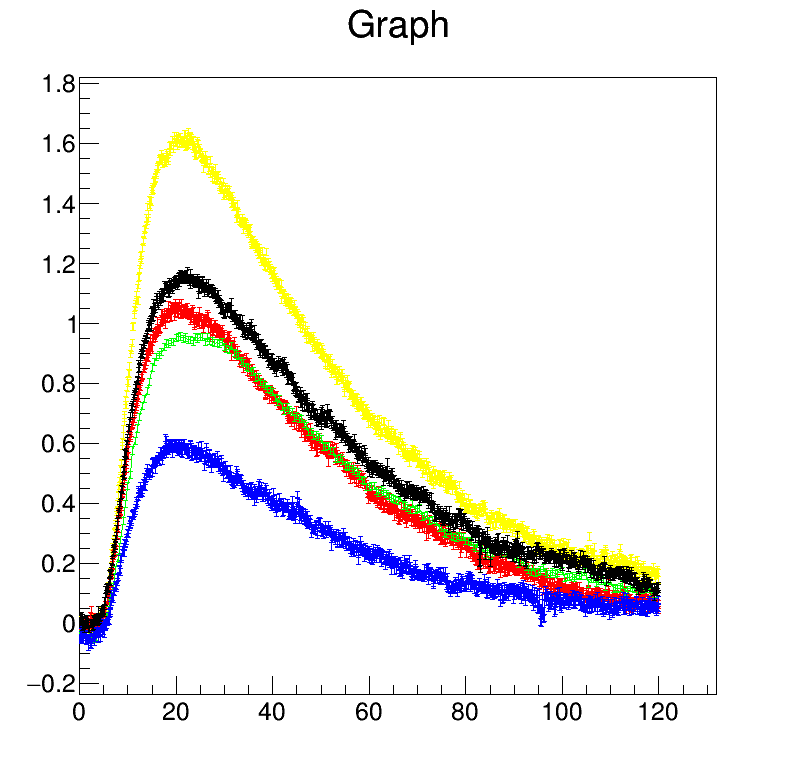

In [41]:
N1=t1.size; N2=t2.size; N3=t3.size; N4=t4.size; N5=t5.size

e_t1=np.zeros(N1); e_t2=np.zeros(N2); e_t3=np.zeros(N3); e_t4=np.zeros(N4); e_t5=np.zeros(N5);
e_tc1=np.ones(N1)*e_tc; e_tc2=np.ones(N2)*e_tc; e_tc3=np.ones(N3)*e_tc
e_tc4=np.ones(N4)*e_tc; e_tc5=np.ones(N5)*e_tc;

g1=TGraphErrors(N1,t1,tc1-_offset,e_t1,e_tc1)
g2=TGraphErrors(N2,t2,tc2-_offset,e_t2,e_tc2)
g3=TGraphErrors(N3,t3,tc3-_offset,e_t3,e_tc3)
g4=TGraphErrors(N4,t4,tc4-_offset,e_t4,e_tc4)
g5=TGraphErrors(N5,t5,tc5-_offset,e_t5,e_tc5)

g1.SetLineColor(1);g2.SetLineColor(2);g3.SetLineColor(3);g4.SetLineColor(4);g5.SetLineColor(5)

c1=TCanvas('c1','',800,800)
c1.Draw()
g5.Draw('AP')
g2.Draw('SAME')
g3.Draw('SAME')
g4.Draw('SAME')
g1.Draw('SAME')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv1


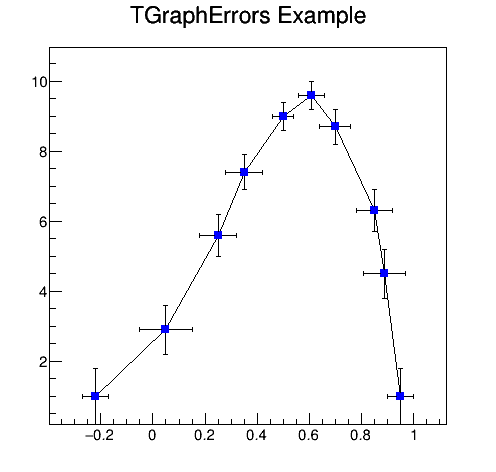

In [26]:
canv1=TCanvas('canv1','',500,500)
canv1.Draw()

n = 10;
x  = np.array(  [ -0.22, 0.05, 0.25, 0.35,  0.5, 0.61,  0.7, 0.85, 0.89, 0.95 ] )
ex = np.array(  [  0.05,  0.1, 0.07, 0.07, 0.04, 0.05, 0.06, 0.07, 0.08, 0.05 ] )
y  = np.array(  [     1,  2.9,  5.6,  7.4,  9.0,  9.6,  8.7,  6.3,  4.5,    1 ] )
ey = np.array(  [  0.8,  0.7,  0.6,  0.5,  0.4,  0.4,  0.5,  0.6,  0.7,  0.8  ] )

gr = TGraphErrors( n, x, y, ex, ey )
gr.SetTitle( 'TGraphErrors Example' )
gr.SetMarkerColor( 4 )
gr.SetMarkerStyle( 21 )
gr.Draw( 'ALP' )